## Time Series Analysis

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Basic data Pre-processing
    ♦ Time-Series related Pre-processing
    ♦ Time-Series Data Aggregation 
    ♦ Data split: train and validation sets
    ♦ Creating Time-Series Object
    ♦ Moving Averages
    ♦ ETS Models

## Problem Statement

A multinational e-commerce company idenified a segment of products which are showing less sales when comapred to other class of products. As the prices of those products are volatile periodically based on demand and other economic factors, if they quote right price on time then the chance of incrasing sales is very high. They want to understand what is right price to quote on a given period for each product which will help them to increase the sales. The given data contains historical data of a product. Perform time series analysis and forecast the price.

In [67]:
library(zoo) # Z's Ordered Observations

library(dplyr)
library(TTR) # Technical Trading Rules
library(forecast)
library(DMwR)
library(tseries)

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

## Data Understanding

In [68]:
## Load the .rds file into R

#data = readRDS("/home/datasets/lab/Data.rds")
data = readRDS("/home/datasets/lab/course_06/Data.rds")

In [129]:
list.files("/home/datasets/lab/course_06")

[1] "chickegg_GC.csv"              "CustomerData.csv"            
[3] "data_SR.csv"                  "Data.rds"                    
[5] "Housing_Data.csv"             "productWeeklyData_Arimax.csv"
[7] "Salesdata_hypermart42.csv"    "WeatherData.csv"

In [69]:
## Dimension of the Data set
dim(data)

[1] 19657     3

In [4]:
## Structure of the Data set
str(data)

Classes ‘data.table’ and 'data.frame':	19657 obs. of  3 variables:
 $ SKU  : num  1 2 3 1 2 2 2 1 1 2 ...
 $ Price: num  130 58 84.4 160 57 ...
 $ Date : chr  "2009-06-01" "2009-06-01" "2009-12-08" "2009-12-08" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [5]:
## Look at the summary statistics
summary(data)

      SKU            Price            Date          
 Min.   :1.000   Min.   : 20.27   Length:19657      
 1st Qu.:1.000   1st Qu.: 50.15   Class :character  
 Median :2.000   Median : 70.97   Mode  :character  
 Mean   :1.942   Mean   : 80.63                     
 3rd Qu.:3.000   3rd Qu.:105.00                     
 Max.   :3.000   Max.   :999.00                     

In [6]:
# Look at the first and last 6 records using head and tail commands

head(data, 6)

,SKU,Price,Date
,<dbl>,<dbl>,<chr>
1,1,129.98,2009-06-01
2,2,57.96,2009-06-01
3,3,84.38,2009-12-08
4,1,159.96,2009-12-08
5,2,56.98,2009-12-08
6,2,58.38,2009-12-08


In [7]:
tail(data, 6)

SKU,Price,Date
<dbl>,<dbl>,<chr>
3,79.62,2013-08-09
2,39.68,2013-08-09
3,78.00,2013-08-09
3,79.62,2013-08-09
3,79.62,2013-08-09
2,38.99,2013-08-09


In [8]:
# Get the unique levels and their counts in SKU attribute
table(data$SKU)


   1    2    3 
6997 6812 5848 

## Basic Pre-processing

In [70]:
# Convert attributes into appropriate type
data$SKU = as.factor(data$SKU)

data$Date = as.Date(data$Date, format="%Y-%m-%d")

# Re-look at the first 6 records
head(data)

SKU,Price,Date
<fct>,<dbl>,<date>
1,129.98,2009-06-01
2,57.96,2009-06-01
3,84.38,2009-12-08
1,159.96,2009-12-08
2,56.98,2009-12-08
2,58.38,2009-12-08


In [10]:
# Summary of the data
summary(data)

 SKU          Price             Date           
 1:6997   Min.   : 20.27   Min.   :2009-03-06  
 2:6812   1st Qu.: 50.15   1st Qu.:2010-10-22  
 3:5848   Median : 70.97   Median :2011-11-06  
          Mean   : 80.63   Mean   :2011-10-25  
          3rd Qu.:105.00   3rd Qu.:2012-11-26  
          Max.   :999.00   Max.   :2013-12-02  

#### Drop rows where Price is 999

In [71]:
## Check the number of rows where Price is 999 

data[data$Price == 999 ,]

SKU,Price,Date
<fct>,<dbl>,<date>
3,999,2010-08-24


In [72]:
## Drop the row where Price is 999

data = data[data$Price != 999 ,]

In [13]:
## Check summary after dropping the row

summary(data)

 SKU          Price             Date           
 1:6997   Min.   : 20.27   Min.   :2009-03-06  
 2:6812   1st Qu.: 50.15   1st Qu.:2010-10-22  
 3:5847   Median : 70.96   Median :2011-11-06  
          Mean   : 80.58   Mean   :2011-10-25  
          3rd Qu.:105.00   3rd Qu.:2012-11-26  
          Max.   :487.72   Max.   :2013-12-02  

## Time-Series related Pre-processing

In [73]:
# Focusing on a particular product of choice (Let's use only SKU code 3 for analysis)
data = data[data$SKU==3,]
# Basic info about that product
dim(data)
summary(data)
head(data)

[1] 5847    3

 SKU          Price             Date           
 1:   0   Min.   : 39.84   Min.   :2009-04-15  
 2:   0   1st Qu.: 60.00   1st Qu.:2011-01-26  
 3:5847   Median : 72.25   Median :2012-03-01  
          Mean   : 73.14   Mean   :2011-12-31  
          3rd Qu.: 83.75   3rd Qu.:2013-01-08  
          Max.   :379.80   Max.   :2013-12-02  

SKU,Price,Date
<fct>,<dbl>,<date>
3,84.38,2009-12-08
3,115.98,2009-06-01
3,115.98,2009-06-02
3,84.38,2009-12-09
3,115.98,2009-06-03
3,84.38,2009-12-10


In [74]:
# As all records has same SKU, it can be removed
data$SKU = NULL
head(data)

# Sort the Data in increasing order of date
data = data[order(data$Date, decreasing=F), ]
head(data)

Price,Date
<dbl>,<date>
84.38,2009-12-08
115.98,2009-06-01
115.98,2009-06-02
84.38,2009-12-09
115.98,2009-06-03
84.38,2009-12-10


Price,Date
<dbl>,<date>
58.65,2009-04-15
79.64,2009-04-16
58.65,2009-04-16
79.64,2009-04-17
58.65,2009-04-17
79.64,2009-04-18


In [75]:
# Handle Duplicates
# On the given date, product has multiple prices, so one way is to consider the min price.
# Use dplyr package to do the same.
#library(dplyr)

data = data %>% group_by(Date) %>% summarise("MinPrice" = min(Price))
data = data.frame(data)
head(data)

,Date,MinPrice
,<date>,<dbl>
1,2009-04-15,58.65
2,2009-04-16,58.65
3,2009-04-17,58.65
4,2009-04-18,79.64
5,2009-05-30,115.98
6,2009-05-31,115.98


In [76]:
# Handle missing values 
minDate = min(data$Date)
maxDate = max(data$Date)

minDate
maxDate

[1] "2009-04-15"

[1] "2013-12-02"

In [77]:
seq = data.frame("DateRange" = seq(minDate, maxDate, by="days"))

data = seq %>% full_join(data, c("DateRange" = "Date"))
data = data.frame(data)

rm(minDate, maxDate, seq)
head(data,10)

,DateRange,MinPrice
,<date>,<dbl>
1,2009-04-15,58.65
2,2009-04-16,58.65
3,2009-04-17,58.65
4,2009-04-18,79.64
5,2009-04-19,NA
6,2009-04-20,NA
7,2009-04-21,NA
8,2009-04-22,NA
9,2009-04-23,NA


In [78]:
# Imputation of Missing Values
data$MinPrice = (na.locf(data$MinPrice, fromLast = FALSE) + 
                   na.locf(data$MinPrice, fromLast = TRUE))/2

head(data)

,DateRange,MinPrice
,<date>,<dbl>
1,2009-04-15,58.65
2,2009-04-16,58.65
3,2009-04-17,58.65
4,2009-04-18,79.64
5,2009-04-19,97.81
6,2009-04-20,97.81


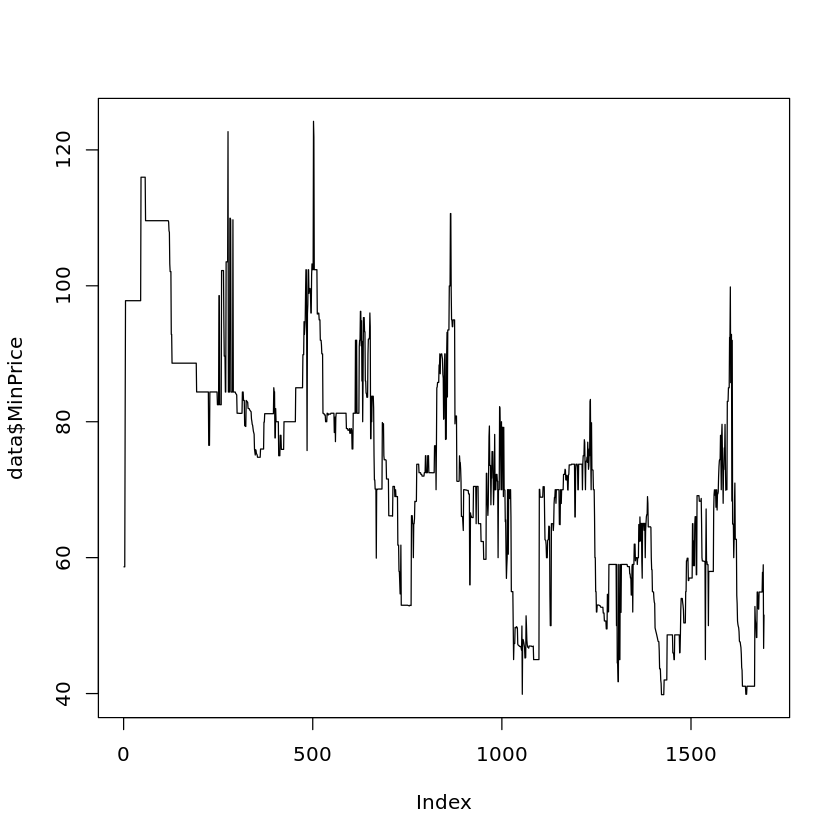

In [79]:
plot(data$MinPrice, type = 'l')

#### Demo of "na.locf()"  function

In [21]:
# Here is the example to understand how "na.locf()"  function works
#library(zoo)
x <- c(1,2,3,4,5,NA,NA,NA,7,8)
x

[1]  1  2  3  4  5 NA NA NA  7  8

In [22]:
# na.locf function is used to replace the missing values. 
# This will replace the missing value with the it's immediate preceding value. 
na.locf(x,fromLast = FALSE)

[1] 1 2 3 4 5 5 5 5 7 8

In [23]:
# When we use the argument fromLast = TRUE , it replace the missing value with the it's immediate succeding value
na.locf(x,fromLast = TRUE,na.rm = FALSE)

[1] 1 2 3 4 5 7 7 7 7 8

In [24]:
# if you want to replace the missing value with average value of it's immediate neighbors, here is the R code. 
#This code is to show that missing value is replaced with it's preceding and succeeding values
na.locf(x,fromLast = FALSE)
na.locf(x,fromLast = TRUE)

(na.locf(x, fromLast = FALSE) + na.locf(x, fromLast = TRUE))/2

rm(x)

[1] 1 2 3 4 5 5 5 5 7 8

[1] 1 2 3 4 5 7 7 7 7 8

[1] 1 2 3 4 5 6 6 6 7 8

## Time-Series Data Aggregation 

In [80]:
# Aggregate Data at month level from day level
# Derive Year and Month attribute 
data$Year = as.numeric(format(data$DateRange, format="%Y"))
data$Month = as.numeric(format(data$DateRange, format="%m"))
head(data)

,DateRange,MinPrice,Year,Month
,<date>,<dbl>,<dbl>,<dbl>
1,2009-04-15,58.65,2009,4
2,2009-04-16,58.65,2009,4
3,2009-04-17,58.65,2009,4
4,2009-04-18,79.64,2009,4
5,2009-04-19,97.81,2009,4
6,2009-04-20,97.81,2009,4


In [81]:
data = data %>% group_by(Year, Month) %>% summarise("MeanPrice" = mean(MinPrice))

head(data)

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



Year,Month,MeanPrice
<dbl>,<dbl>,<dbl>
2009,4,89.33187
2009,5,98.98226
2009,6,111.71333
2009,7,109.58000
2009,8,99.34645
2009,9,88.61500


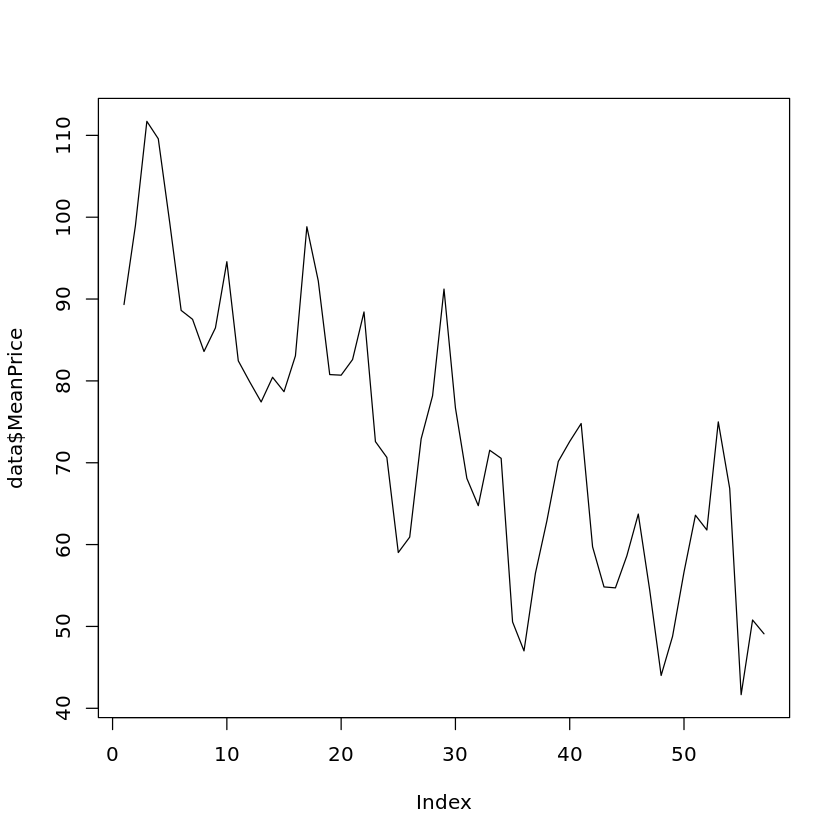

In [27]:
data = data.frame(data)
plot(data$MeanPrice, type = 'l')

In [82]:
# Creating sequence Time variable.
data$Time = 1:nrow(data)
# Month attribute is used in future model for seasonality 
data$Month = as.factor(data$Month)

# Year attribute is not required further, so removing it
data$Year = NULL

head(data)

Month,MeanPrice,Time
<fct>,<dbl>,<int>
4,89.33187,1
5,98.98226,2
6,111.71333,3
7,109.58000,4
8,99.34645,5
9,88.61500,6


## Data split: train and validation sets

In [83]:
# Splitting the Dataset into Train and Test
train = data[1:53,]
val = data[54:nrow(data),]
#rm(data)

In [84]:
train

Month,MeanPrice,Time
<fct>,<dbl>,<int>
4,89.33187,1
5,98.98226,2
6,111.71333,3
7,109.58000,4
8,99.34645,5
9,88.61500,6
10,87.52210,7
11,83.59500,8
12,86.47677,9


In [85]:
val

Month,MeanPrice,Time
<fct>,<dbl>,<int>
9,66.84800,54
10,41.66387,55
11,50.78450,56
12,49.10000,57


## Regression on Time

In [86]:
# Simple Linear Regression
lm1 = lm(MeanPrice~Time, data = train)
summary(lm1)


Call:
lm(formula = MeanPrice ~ Time, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.834  -5.766  -1.474   5.825  22.394 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.02243    2.61063  37.164  < 2e-16 ***
Time        -0.83822    0.08413  -9.964 1.46e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.369 on 51 degrees of freedom
Multiple R-squared:  0.6606,	Adjusted R-squared:  0.654 
F-statistic: 99.28 on 1 and 51 DF,  p-value: 1.459e-13


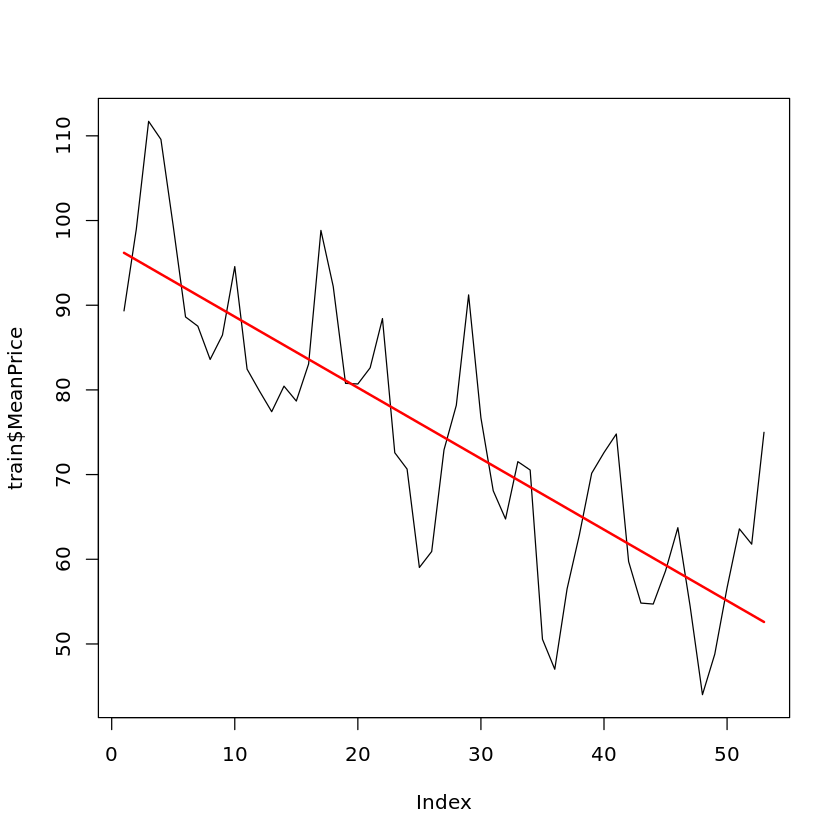

In [87]:
# get predictions on train and validation 
pred_Train = predict(lm1)
pred_Val  = predict(lm1, val)

# plot the train data along with predictions
plot(train$MeanPrice, type="l")
lines(train$Time, pred_Train, col="red", lwd=2)

In [34]:
# Evaluate model performance
lm1TrainError = regr.eval(train$MeanPrice, pred_Train)
lm1ValError  = regr.eval(val$MeanPrice, pred_Val)
lm1TrainError
lm1ValError

mae        mse       rmse       mape 
 7.3604306 84.4599186  9.1902078  0.1050726

mae        mse       rmse       mape 
 6.2980475 78.4718183  8.8584320  0.1161648

In [88]:
# Linear Regression Model using Month Variable (to capture Seasonality)
str(train)
slm1 <- lm(MeanPrice~., data=train)
summary(slm1)

tibble [53 × 3] (S3: tbl_df/tbl/data.frame)
 $ Month    : Factor w/ 12 levels "1","2","3","4",..: 4 5 6 7 8 9 10 11 12 1 ...
 $ MeanPrice: num [1:53] 89.3 99 111.7 109.6 99.3 ...
 $ Time     : int [1:53] 1 2 3 4 5 6 7 8 9 10 ...



Call:
lm(formula = MeanPrice ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0569  -2.8466   0.7989   2.9696  11.9076 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.10638    3.25374  31.689  < 2e-16 ***
Month2      -13.45867    4.10584  -3.278 0.002168 ** 
Month3      -17.22491    4.10684  -4.194 0.000147 ***
Month4      -15.64557    3.89800  -4.014 0.000255 ***
Month5       -9.03884    3.89623  -2.320 0.025534 *  
Month6       -0.75135    3.89517  -0.193 0.848020    
Month7        1.72902    3.89482   0.444 0.659488    
Month8        9.37220    3.89517   2.406 0.020836 *  
Month9       -3.39729    4.11086  -0.826 0.413470    
Month10      -9.05949    4.10852  -2.205 0.033262 *  
Month11     -10.07176    4.10684  -2.452 0.018648 *  
Month12      -5.35198    4.10584  -1.304 0.199855    
Time         -0.84976    0.05248 -16.192  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

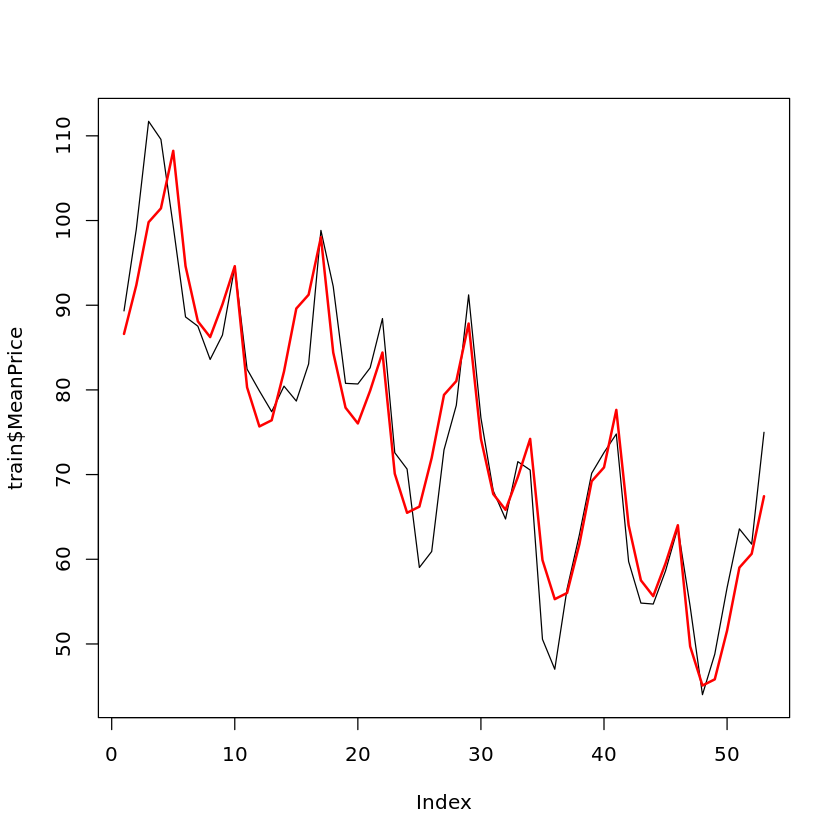

In [89]:
# get predictions on train and test
pred_Train = predict(slm1)
pred_Val  = predict(slm1, val)

# plot the train data along with predictions
plot(train$MeanPrice, type="l")
points(train$Time, pred_Train, type="l", col="red", lwd=2)

In [90]:
# Evaluate model performance
slm1TrainError = regr.eval(train$MeanPrice, pred_Train)
slm1ValError = regr.eval(val$MeanPrice, pred_Val)
slm1TrainError
slm1ValError

mae         mse        rmse        mape 
 3.98447730 25.44172377  5.04397896  0.05487652

mae        mse       rmse       mape 
 6.0566694 57.5215150  7.5842940  0.1099742

## Creating Time-Series Object

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,89.33187,98.98226,111.71333,109.58000,99.34645,88.61500,87.52210,83.59500,86.47677
2010,94.56161,82.45250,79.88065,77.42767,80.44161,78.68367,83.06452,98.83145,92.20900,80.77274,80.69867,82.61000
2011,88.42161,72.58196,70.64968,59.03067,60.91677,72.91667,78.18194,91.21645,76.70200,68.08935,64.75600,71.52661
2012,70.53839,50.55517,47.01290,56.50133,62.88645,70.15700,72.60000,74.79161,59.73300,54.82694,54.71333,58.62968
2013,63.73032,54.42857,44.01097,48.79200,56.64129,63.58633,61.78355,74.99113,,,,


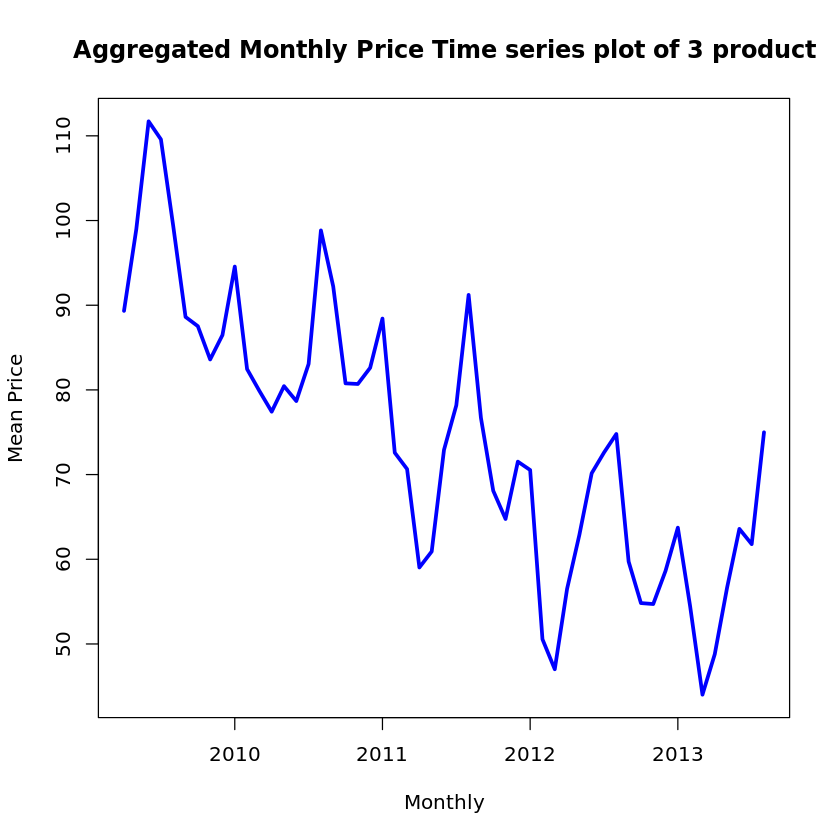

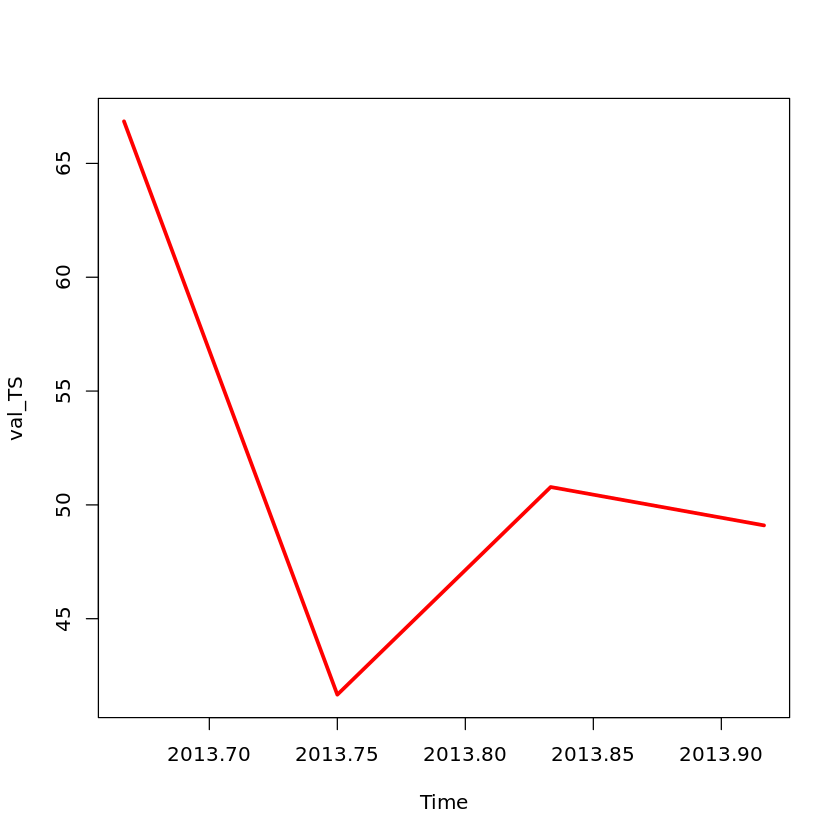

In [91]:
# Converting data into R time series object 
train_TS <- ts(train$MeanPrice, frequency = 12, start = c(2009, 4))
train_TS

val_TS <- ts(val$MeanPrice, frequency = 12, start = c(2013, 9))
#val_TS


# Visualize the time series Data
plot(train_TS, 
     type="l", lwd=3, col="blue", 
     xlab="Monthly", ylab="Mean Price",
     main="Aggregated Monthly Price Time series plot of 3 product")
plot(val_TS, col="red", lwd=3)

## Moving Averages

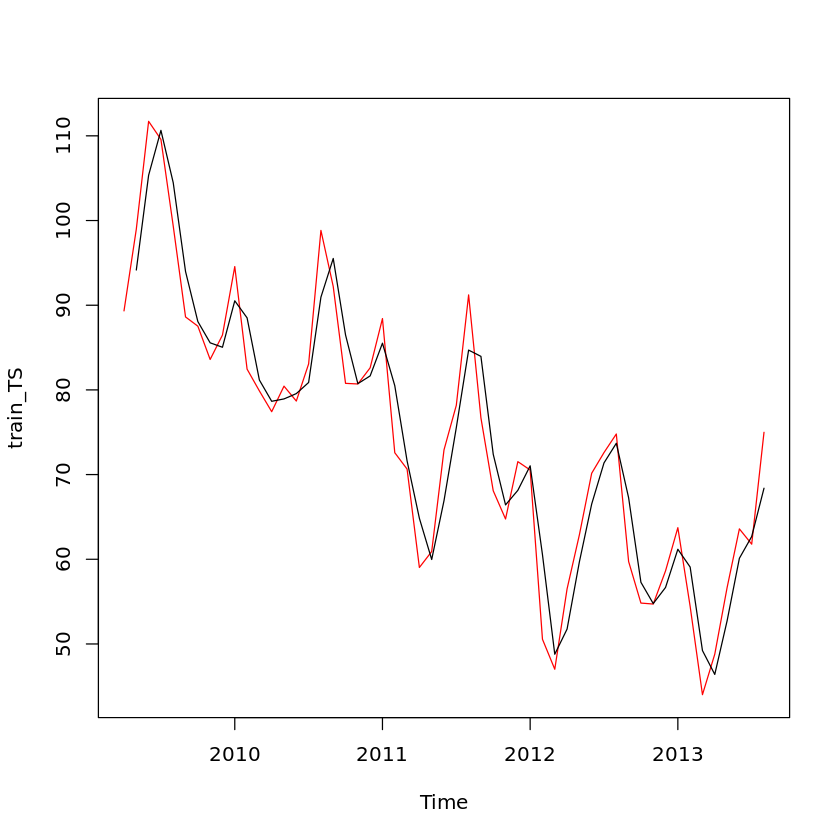

In [92]:
# Modelling  the time series using simple moving averages
fitsma = SMA(train_TS, n=2)

plot(train_TS, col='red')
lines(fitsma,  col='black')

In [40]:
train_TS

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,89.33187,98.98226,111.71333,109.58000,99.34645,88.61500,87.52210,83.59500,86.47677
2010,94.56161,82.45250,79.88065,77.42767,80.44161,78.68367,83.06452,98.83145,92.20900,80.77274,80.69867,82.61000
2011,88.42161,72.58196,70.64968,59.03067,60.91677,72.91667,78.18194,91.21645,76.70200,68.08935,64.75600,71.52661
2012,70.53839,50.55517,47.01290,56.50133,62.88645,70.15700,72.60000,74.79161,59.73300,54.82694,54.71333,58.62968
2013,63.73032,54.42857,44.01097,48.79200,56.64129,63.58633,61.78355,74.99113,,,,


In [41]:
fitsma

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,NA,94.15707,105.34780,110.64667,104.46323,93.98073,88.06855,85.55855,85.03589
2010,90.51919,88.50706,81.16657,78.65416,78.93464,79.56264,80.87409,90.94798,95.52023,86.49087,80.73570,81.65433
2011,85.51581,80.50179,71.61582,64.84017,59.97372,66.91672,75.54930,84.69919,83.95923,72.39568,66.42268,68.14131
2012,71.03250,60.54678,48.78404,51.75712,59.69389,66.52173,71.37850,73.69581,67.26231,57.27997,54.77013,56.67151
2013,61.18000,59.07945,49.21977,46.40148,52.71665,60.11381,62.68494,68.38734,,,,


In [42]:
(89.33187+98.98226)/2

[1] 94.15706

In [43]:
fitsma = SMA(train_TS, n=3)
fitsma

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,NA,NA,100.00916,106.75853,106.87993,99.18048,91.82785,86.57737,85.86462
2010,88.21113,87.83030,85.63159,79.92027,79.24997,78.85098,80.72993,86.85988,91.36832,90.60440,84.56014,81.36047
2011,83.91009,81.20453,77.21775,67.42077,63.53237,64.28804,70.67179,80.77168,82.03346,78.66927,69.84912,68.12399
2012,68.94033,64.20672,56.03549,51.35647,55.46690,63.18159,68.54782,72.51620,69.04154,63.11718,56.42442,56.05665
2013,59.02444,58.92952,54.05662,49.07718,49.81475,56.33987,60.67039,66.78700,,,,


In [44]:
(89.33187+98.98226+111.71333)/3

[1] 100.0092

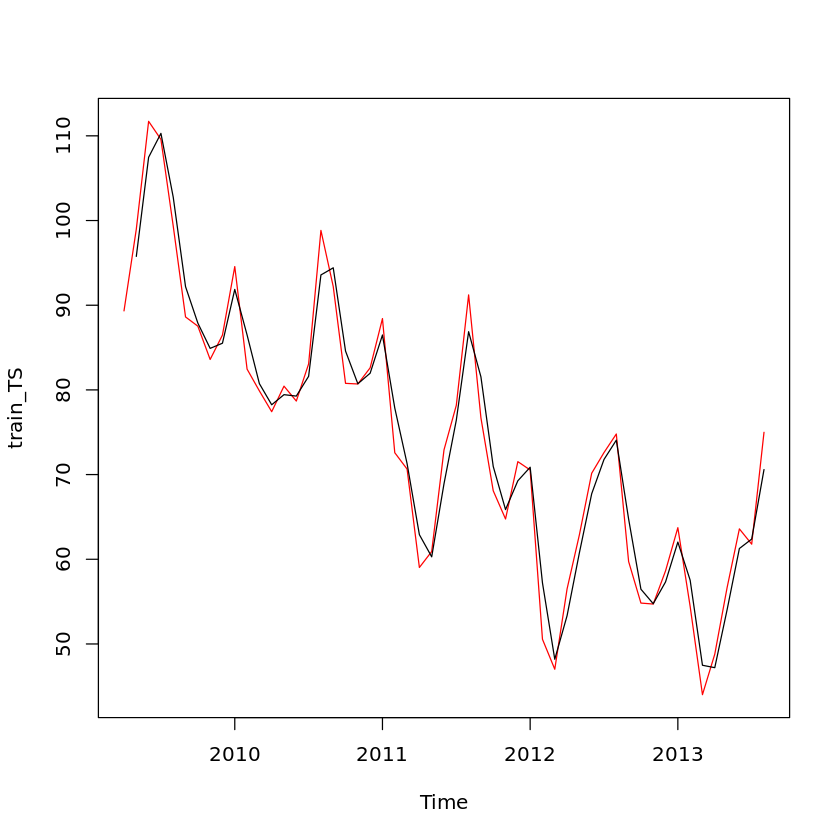

In [93]:
# Weighted Moving Averages
fitwma = WMA(train_TS, n=2, 1:2)

plot(train_TS, col='red')
lines(fitwma, col='black')

In [94]:
train_TS

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,89.33187,98.98226,111.71333,109.58000,99.34645,88.61500,87.52210,83.59500,86.47677
2010,94.56161,82.45250,79.88065,77.42767,80.44161,78.68367,83.06452,98.83145,92.20900,80.77274,80.69867,82.61000
2011,88.42161,72.58196,70.64968,59.03067,60.91677,72.91667,78.18194,91.21645,76.70200,68.08935,64.75600,71.52661
2012,70.53839,50.55517,47.01290,56.50133,62.88645,70.15700,72.60000,74.79161,59.73300,54.82694,54.71333,58.62968
2013,63.73032,54.42857,44.01097,48.79200,56.64129,63.58633,61.78355,74.99113,,,,


In [47]:
fitwma

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,NA,95.76546,107.46964,110.29111,102.75763,92.19215,87.88640,84.90403,85.51618
2010,91.86667,86.48887,80.73793,78.24533,79.43696,79.26965,81.60423,93.57581,94.41648,84.58483,80.72336,81.97289
2011,86.48441,77.86185,71.29377,62.90367,60.28807,68.91670,76.42685,86.87161,81.54015,70.96024,65.86712,69.26974
2012,70.86780,57.21624,48.19366,53.33852,60.75808,67.73348,71.78567,74.06108,64.75254,56.46229,54.75120,57.32423
2013,62.03011,57.52916,47.48350,47.19832,54.02486,61.27132,62.38448,70.58860,,,,


In [48]:
(89.33187*(1/3)+98.98226*(2/3))

[1] 95.76546

In [49]:
fitwma = WMA(train_TS, n=2, c(0.25,0.75))

In [50]:
fitwma

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,NA,96.56966,108.53056,110.11333,101.90484,91.29786,87.79532,84.57677,85.75633
2010,92.54040,85.47978,80.52361,78.04091,79.68813,79.12315,81.96930,94.88972,93.86461,83.63181,80.71719,82.13217
2011,86.96871,76.54188,71.13275,61.93542,60.44525,69.91669,76.86562,87.95782,80.33061,70.24252,65.58934,69.83396
2012,70.78544,55.55098,47.89847,54.12923,61.29017,68.33936,71.98925,74.24371,63.49765,56.05345,54.74173,57.65059
2013,62.45516,56.75401,46.61537,47.59674,54.67897,61.85007,62.23424,71.68923,,,,


In [51]:
(89.33187*(0.25)+98.98226*(0.75))

[1] 96.56966

## Simple Exponential Smoothing

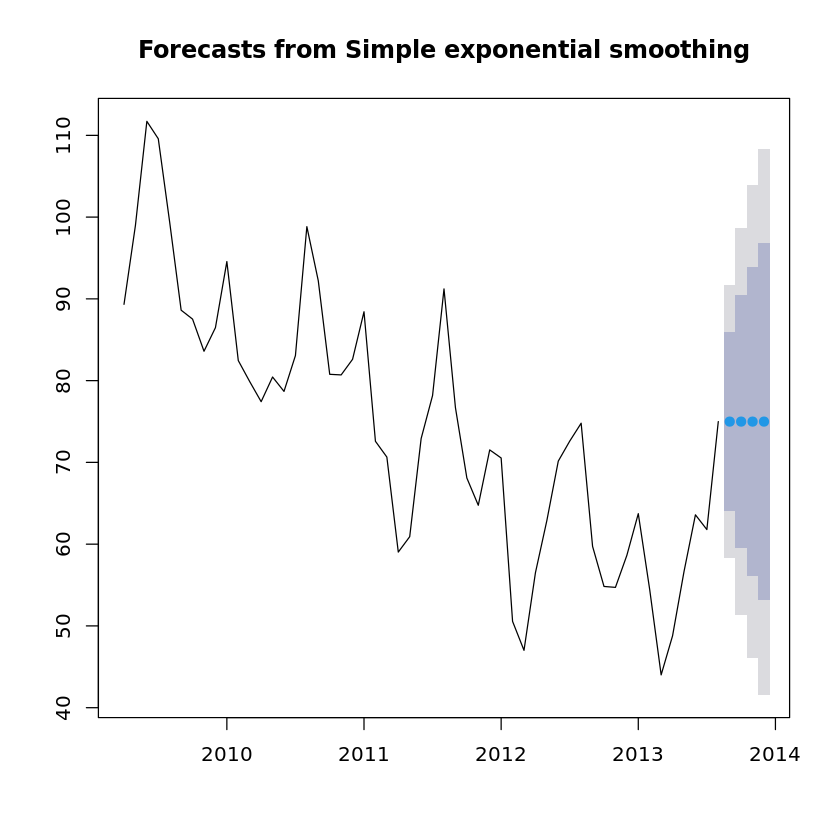

In [104]:
fitses = ses(train_TS, h=4)
plot(fitses)

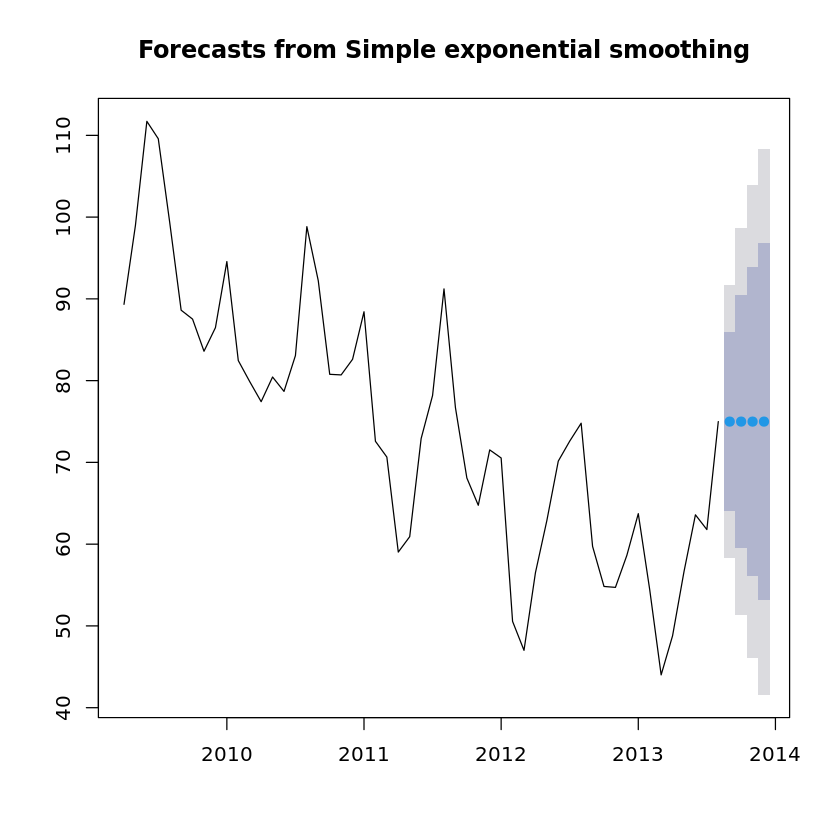

In [105]:
# Simple Exponential Smoothing Model
fitses = ses(train_TS, h=4)
plot(fitses)

In [106]:
summary(fitses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = train_TS, h = 4) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 89.3301 

  sigma:  8.5209

     AIC     AICc      BIC 
441.4940 441.9838 447.4048 

Error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.2705993 8.358572 6.790359 -1.039776 9.621576 0.6393295
                  ACF1
Training set 0.1491358

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Sep 2013       74.98981 64.06985 85.90977 58.28917  91.69044
Oct 2013       74.98981 59.54743 90.43219 51.37272  98.60689
Nov 2013       74.98981 56.07715 93.90247 46.06539 103.91423
Dec 2013       74.98981 53.15153 96.82809 41.59104 108.38858

In [107]:
pred_Train = fitses$fitted
pred_Val = forecast(fitses, h=4)

In [109]:
pred_Val

         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Sep 2013       74.98981 64.06985 85.90977 58.28917  91.69044
Oct 2013       74.98981 59.54743 90.43219 51.37272  98.60689
Nov 2013       74.98981 56.07715 93.90247 46.06539 103.91423
Dec 2013       74.98981 53.15153 96.82809 41.59104 108.38858

In [111]:
val$MeanPrice

[1] 66.84800 41.66387 50.78450 49.10000

In [110]:
# Find error for slm1 on both Test and Train data
sesTrainError = regr.eval(train$MeanPrice, pred_Train)
sesValError = regr.eval(val$MeanPrice, pred_Val$mean)
sesTrainError
sesValError

mae         mse        rmse        mape 
 6.79035912 69.86572313  8.35857184  0.09621576

mae         mse        rmse        mape 
 22.8907155 608.2715659  24.6631621   0.4813968

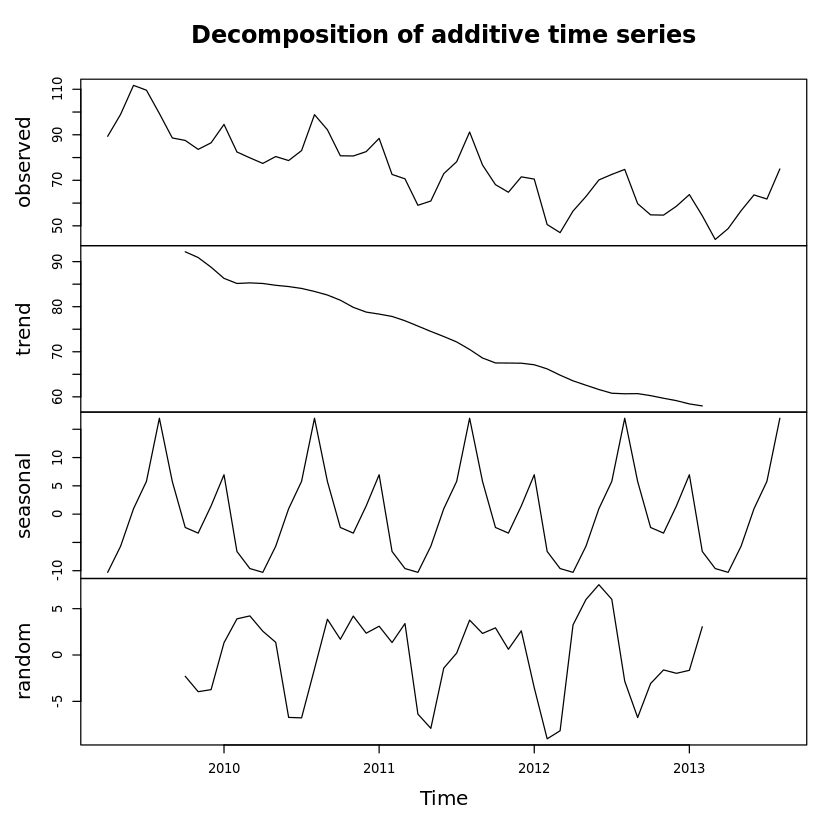

In [56]:
plot(decompose(train_TS))

## ETS Models 

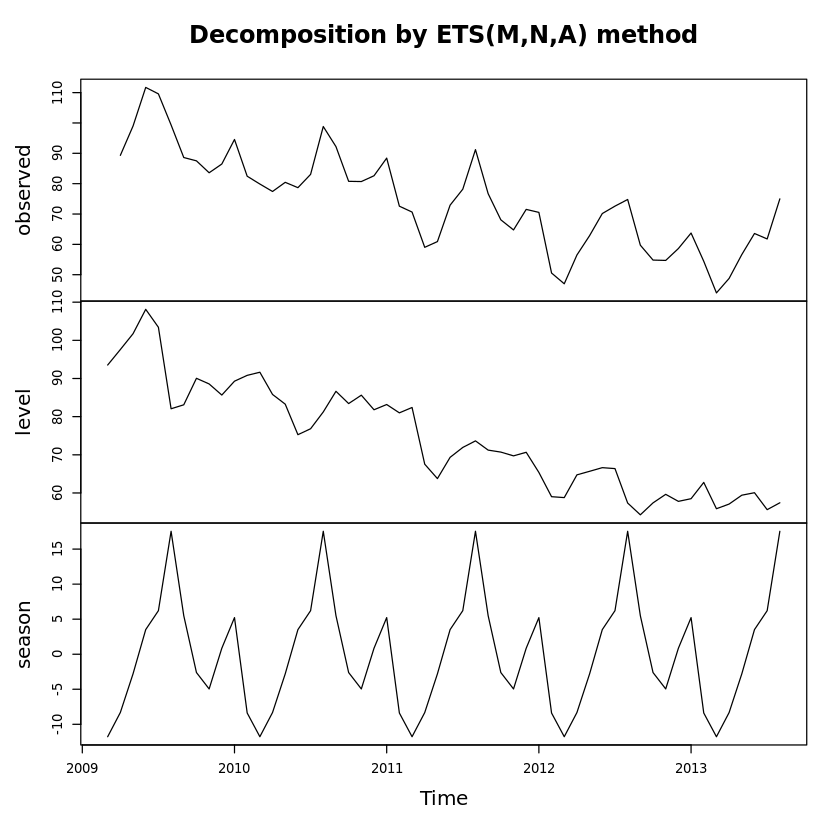

In [112]:
# ETS Models
fitets = ets(train_TS)
plot(fitets)

In [113]:
summary(fitets)

ETS(M,N,A) 

Call:
 ets(y = train_TS) 

  Smoothing parameters:
    alpha = 0.9872 
    gamma = 7e-04 

  Initial states:
    l = 93.5283 
    s = -11.7727 -8.3873 5.2205 0.8559 -4.9564 -2.6192
           5.496 17.5554 6.2163 3.5086 -2.8034 -8.3139

  sigma:  0.0756

     AIC     AICc      BIC 
405.6942 418.6672 435.2486 

Training set error measures:
                     ME     RMSE      MAE       MPE    MAPE      MASE
Training set -0.6899151 5.239519 3.744344 -1.132909 5.14872 0.3525395
                   ACF1
Training set 0.07851226

In [114]:
fitets$fitted
train_TS

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,85.21446,94.78982,105.24075,114.33851,120.97981,87.56301,80.48635,85.09516,89.42641
2010,90.87899,80.90689,79.04739,83.33165,83.01349,86.78796,81.48708,94.37193,86.73074,84.02799,78.47122,86.48153
2011,87.02852,74.79463,69.22431,74.08851,64.73555,67.27523,75.55138,89.47789,79.15114,68.61612,65.75679,70.57586
2012,75.88724,56.99493,47.25393,50.46168,61.94480,69.19067,72.84929,83.93208,62.86221,51.65711,52.44689,60.49285
2013,63.02187,50.10885,50.99434,47.55006,54.29317,62.92759,66.28171,73.16373,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2009,,,,89.33187,98.98226,111.71333,109.58000,99.34645,88.61500,87.52210,83.59500,86.47677
2010,94.56161,82.45250,79.88065,77.42767,80.44161,78.68367,83.06452,98.83145,92.20900,80.77274,80.69867,82.61000
2011,88.42161,72.58196,70.64968,59.03067,60.91677,72.91667,78.18194,91.21645,76.70200,68.08935,64.75600,71.52661
2012,70.53839,50.55517,47.01290,56.50133,62.88645,70.15700,72.60000,74.79161,59.73300,54.82694,54.71333,58.62968
2013,63.73032,54.42857,44.01097,48.79200,56.64129,63.58633,61.78355,74.99113,,,,


In [115]:
forecast_ets = forecast(fitets, h=4)
forecast_ets
val_pred = forecast_ets$mean
as.numeric(val_pred)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 2013       62.92594 56.83164 69.02024 53.60552 72.24636
Oct 2013       54.81446 46.77779 62.85113 42.52343 67.10549
Nov 2013       52.47423 42.98421 61.96425 37.96049 66.98797
Dec 2013       58.27983 47.24508 69.31457 41.40364 75.15601

[1] 62.92594 54.81446 52.47423 58.27983

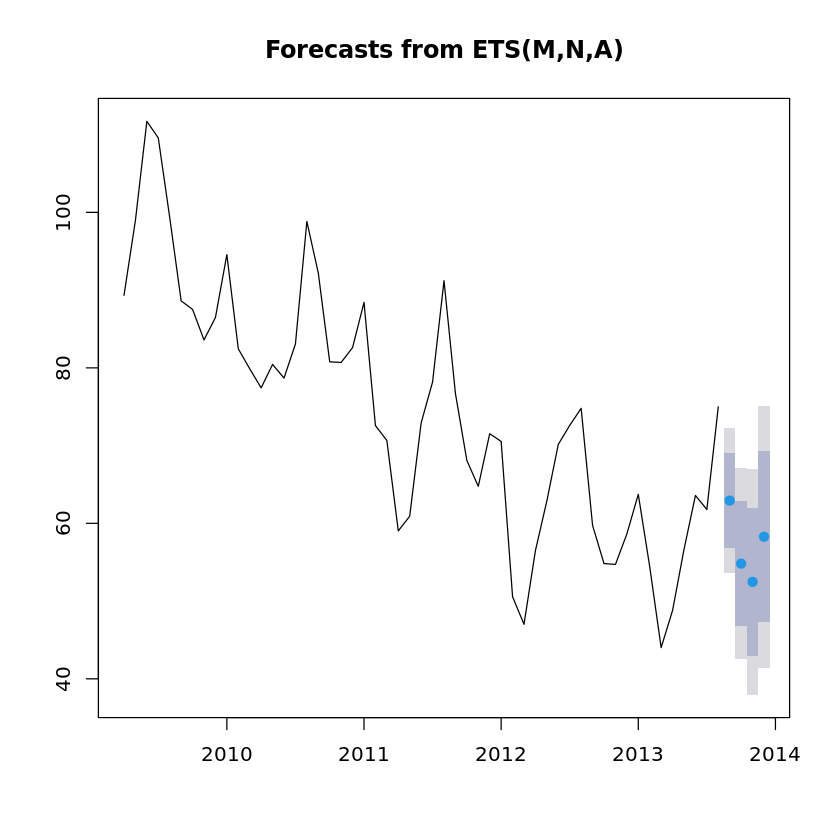

In [61]:
plot(forecast_ets)


	Ljung-Box test

data:  Residuals from ETS(M,N,A)
Q* = 31.95, df = 3, p-value = 5.362e-07

Model df: 14.   Total lags used: 17



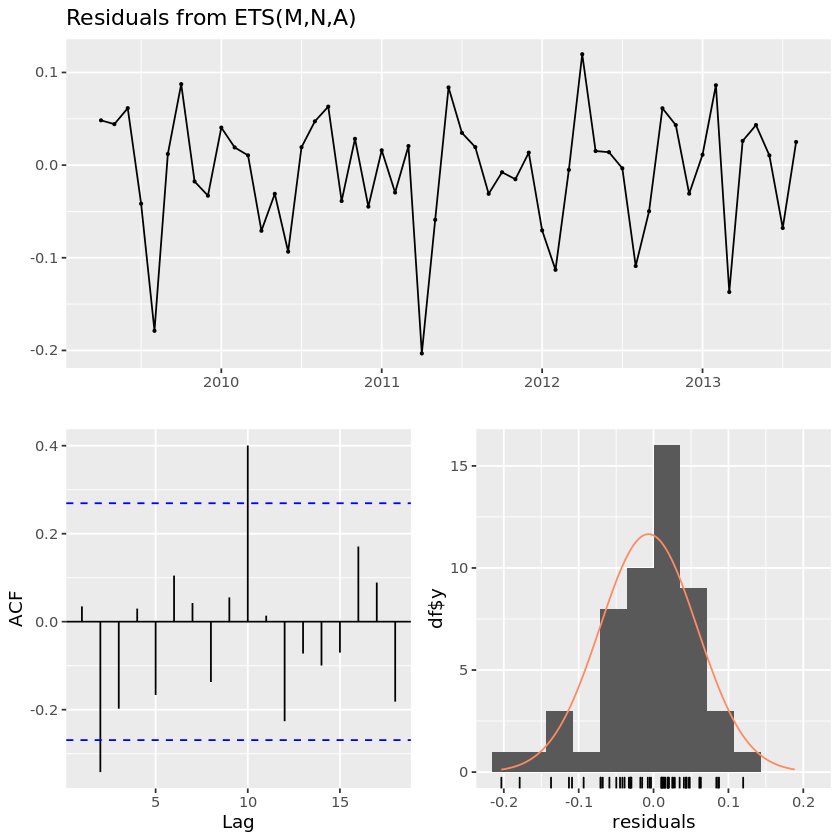

In [116]:
checkresiduals(fitets)
##𝐻_0:𝑍𝑒𝑟𝑜 𝑐𝑜𝑟𝑟𝑒𝑙𝑎𝑡𝑖𝑜𝑛 𝑎𝑚𝑜𝑛𝑔 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙𝑠
##𝐻_1:𝑆𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑡 𝑐𝑜𝑟𝑟𝑒𝑙𝑎𝑡𝑖𝑜𝑛 𝑎𝑚𝑜𝑛𝑔 𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙𝑠

In [117]:
regr.eval(train_TS, fitets$fitted)
regr.eval(val_TS, val_pred)

mae        mse       rmse       mape 
 3.7443444 27.4525558  5.2395187  0.0514872

mae        mse       rmse       mape 
 6.9855519 68.8612440  8.2982675  0.1486353

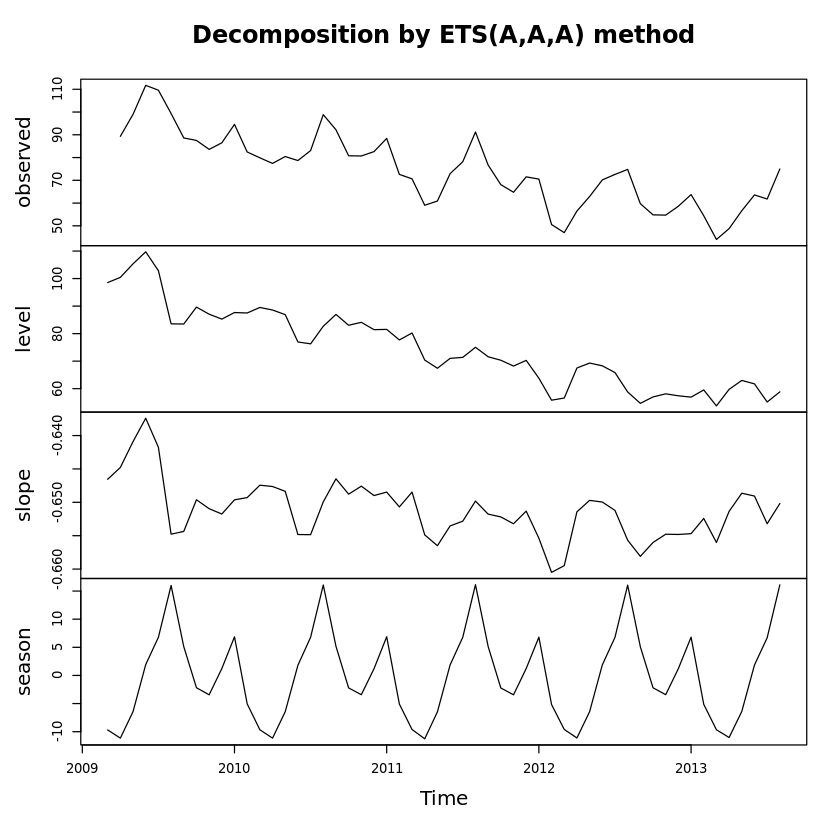

In [118]:
# ETS Models
fitets = ets(train_TS, model="AAA")
plot(fitets)

In [119]:
forecast_ets = forecast(fitets, h=4)
forecast_ets
val_pred = forecast_ets$mean
as.numeric(val_pred)


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 2013       63.28834 55.47830 71.09838 51.34391 75.23276
Oct 2013       55.33814 44.41331 66.26297 38.63006 72.04623
Nov 2013       53.46466 40.13093 66.79839 33.07248 73.85684
Dec 2013       57.46084 42.08859 72.83310 33.95100 80.97068

[1] 63.28834 55.33814 53.46466 57.46084

In [120]:
regr.eval(train_TS, fitets$fitted)
regr.eval(val_TS, val_pred)

mae         mse        rmse        mape 
 3.77622771 25.92747954  5.09190333  0.05290586

mae        mse       rmse       mape 
 7.0687344 69.1859624  8.3178100  0.1511279

In [121]:
summary(fitets)

ETS(A,A,A) 

Call:
 ets(y = train_TS, model = "AAA") 

  Smoothing parameters:
    alpha = 0.9774 
    beta  = 7e-04 
    gamma = 0.0122 

  Initial states:
    l = 98.5567 
    b = -0.6465 
    s = -9.6908 -5.0557 6.829 1.2309 -3.4231 -2.2722
           5.1108 16.2254 6.8615 1.8654 -6.5031 -11.1783

  sigma:  6.0942

     AIC     AICc      BIC 
416.9566 434.4423 450.4515 

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.1005148 5.091903 3.776228 -0.1593852 5.290586 0.3555414
                   ACF1
Training set 0.09897399

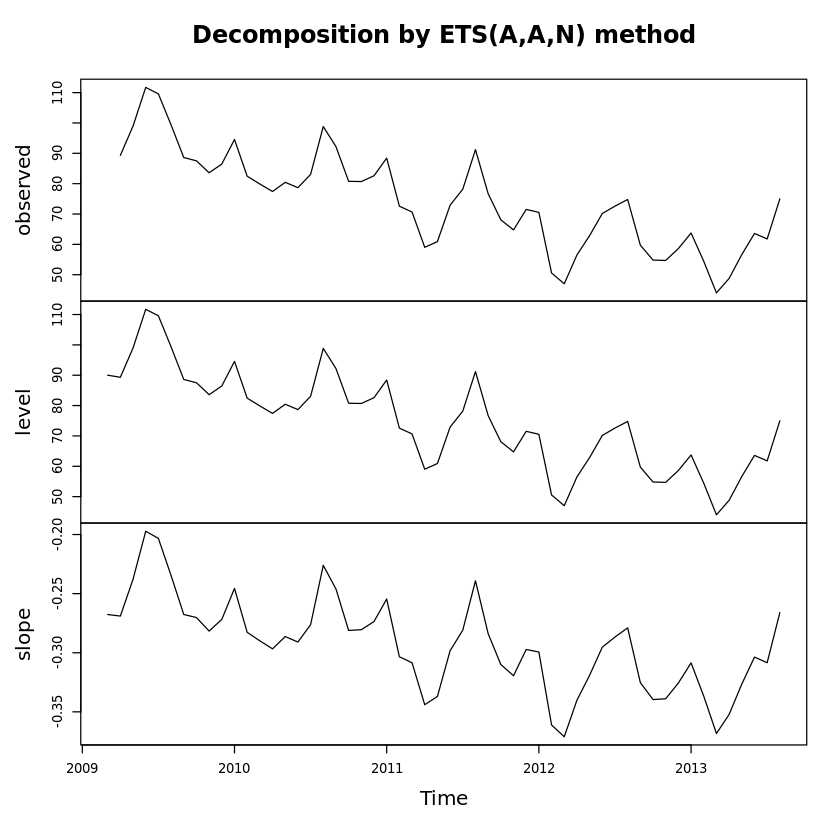

In [122]:
# ETS Models
fitets = ets(train_TS, model="AAN")
plot(fitets)

In [123]:
forecast_ets = forecast(fitets, h=4)
forecast_ets
val_pred = forecast_ets$mean
as.numeric(val_pred)

         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Sep 2013       74.72372 63.57151 85.87594 57.66788  91.77956
Oct 2013       74.45767 58.66211 90.25323 50.30045  98.61489
Nov 2013       74.19162 54.81610 93.56713 44.55932 103.82391
Dec 2013       73.92556 51.51781 96.33331 39.65587 108.19525

[1] 74.72372 74.45767 74.19162 73.92556

In [124]:
regr.eval(train_TS, fitets$fitted)
regr.eval(val_TS, val_pred)

mae         mse        rmse        mape 
 6.81651262 70.01164437  8.36729612  0.09643769

mae         mse        rmse        mape 
 22.2255494 575.4154351  23.9878185   0.4678606

In [125]:
summary(fitets)

ETS(A,A,N) 

Call:
 ets(y = train_TS, model = "AAN") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0031 

  Initial states:
    l = 90.0151 
    b = -0.2677 

  sigma:  8.7021

     AIC     AICc      BIC 
445.6045 446.8811 455.4560 

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.009689442 8.367296 6.816513 -0.631482 9.643769 0.6417919
                  ACF1
Training set 0.1473232

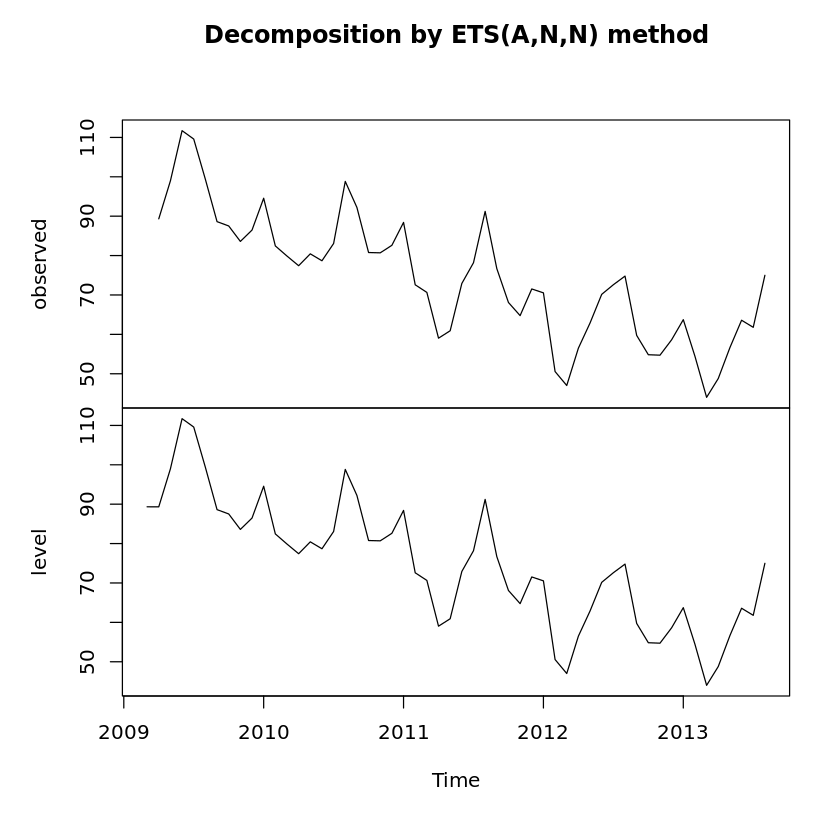

In [126]:
# ETS Models
fitets = ets(train_TS, model="ANN")
plot(fitets)

In [127]:
forecast_ets = forecast(fitets, h=4)
forecast_ets
val_pred = forecast_ets$mean
as.numeric(val_pred)

         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Sep 2013       74.98981 64.06985 85.90977 58.28917  91.69044
Oct 2013       74.98981 59.54742 90.43219 51.37272  98.60689
Nov 2013       74.98981 56.07714 93.90247 46.06539 103.91423
Dec 2013       74.98981 53.15153 96.82808 41.59104 108.38857

[1] 74.98981 74.98981 74.98981 74.98981

In [128]:
regr.eval(train_TS, fitets$fitted)
regr.eval(val_TS, val_pred)

mae         mse        rmse        mape 
 6.79040783 69.86572688  8.35857206  0.09621631

mae         mse        rmse        mape 
 22.8907132 608.2714605  24.6631600   0.4813968

# Conclusion 
#### Sales have been forecasted for the year 2013 and we have checked the accuracy by testing it on validation data set and the difference in between the output is not so much. So can say that the model built and implemented works well and gives us the information about next weekly sales of E-commerce company by using historical data.